In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# other functions we need
from ast import literal_eval

In [2]:
# import SQL dependencies
import sqlite3

# connect to .db
con = sqlite3.connect("../data-collection/nyt-sudoku.db")
cur = con.cursor()

doks_perf = pd.read_sql("SELECT * from doks_performance;",
           con)

doks_easy = pd.read_sql("SELECT * from doks_easy;",
           con)

In [3]:
doks_perf

,date,doks_order,times
0,"January 23, 2023","[70, 59, 3, 54, 11, 10, 20, 18, 13, 12, 24, 26...","[13.395, 2.952, 1.854, 22.153, 1.588, 1.44, 2...."
1,"January 24, 2023","[22, 57, 56, 69, 67, 74, 9, 1, 2, 29, 46, 23, ...","[3.259, 3.111, 10.104, 1.749, 4.859, 5.247, 2...."
2,"January 25, 2023","[15, 64, 27, 46, 18, 12, 6, 17, 34, 43, 29, 49...","[3.839, 7.636, 5.141, 3.377, 10.947, 4.145, 1...."
3,"February 2, 2023","[20, 36, 21, 2, 10, 11, 19, 26, 8, 5, 41, 45, ...","[3.213, 3.308, 7.301, 1.776, 3.999, 2.488, 1.3..."
4,"February 3, 2023","[3, 25, 42, 47, 73, 68, 74, 45, 67, 61, 59, 63...","[7.881, 1.891, 2.165, 2.742, 1.978, 2.616, 2.3..."
...,...,...,...
83,"January 11, 2024","[14,48,24,12,22,21,2,1,68,61,10,9,18,25,44,34,...","[8.557,4.874,4.643,1.996,2.25,0.503,5.574,2.07..."
84,"January 12, 2024","[19,15,6,21,32,62,51,43,34,33,30,50,41,41,39,2...","[5.27,1.87,2.55,3.066,7.503,6.719,2.763,2.265,..."
85,"January 15, 2024","[21,29,46,32,76,68,40,33,52,43,34,41,37,56,60,...","[3.93,3.722,7.496,2.807,1.767,8.868,2.328,3.01..."
86,"January 21, 2024","[17,62,35,75,5,10,65,77,77,25,8,15,4,1,19,18,2...","[17.076,8.611,13.109,11.335,25.06,1.599,2.463,..."


In [4]:
# create empty dictionary
times_by_cell = {}

# populate dictionary with keys (cell indices)
# and values (empty lists for now)
for _ in range(81):
    times_by_cell[_] = []
    
times_by_cell

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [],
 77: [],
 78: [],
 79: [],
 80: []}

In [6]:
# create a DataFrame to hold total time data for each puzzle
time_spent_per_cell = pd.DataFrame(columns=range(0,81))
time_spent_per_cell

# loop through every order in the doks_order column
for (i, order) in enumerate(doks_perf.doks_order.apply(literal_eval)):
    
    # create temporary dictionary to store
    # the spent on each cell for this
    # particular puzzle
    temp_dict = {}
    
    for (list_index, cell_index) in enumerate(order):
        
        # update dictionary
        # if the dictionary already has a value for the chosen cell index
        # add the new value to it. This is if the user makes a mistake and
        # fills out a cell more than once
        temp_dict[cell_index] = temp_dict.get(cell_index, 0) + doks_perf.times.apply(literal_eval)[i][list_index]
        
    # append this temp_dict to time_spent_per_cell
    time_spent_per_cell = time_spent_per_cell.append([temp_dict])

In [7]:
time_spent_per_cell

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,NaN,NaN,NaN,1.854,NaN,NaN,8.650,1.726,0.782,NaN,...,NaN,4.240,NaN,NaN,4.673,NaN,1.993,NaN,NaN,3.453
0,NaN,3.234,2.826,NaN,NaN,NaN,NaN,NaN,NaN,2.128,...,1.658,NaN,1.463,5.247,NaN,NaN,5.855,NaN,5.044,3.518
0,NaN,NaN,2.767,NaN,2.909,NaN,1.622,NaN,NaN,NaN,...,0.605,11.780,NaN,NaN,NaN,3.983,NaN,4.604,0.659,11.649
0,NaN,NaN,1.776,NaN,NaN,5.693,1.606,5.969,4.984,NaN,...,NaN,1.380,NaN,NaN,4.290,NaN,4.128,5.211,8.828,NaN
0,NaN,2.336,12.511,7.881,5.560,NaN,NaN,NaN,NaN,NaN,...,4.044,NaN,1.978,2.384,NaN,NaN,2.926,2.815,NaN,3.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,2.073,5.574,NaN,NaN,NaN,0.898,NaN,1.104,7.764,...,4.287,4.399,1.672,NaN,NaN,3.677,1.250,0.697,NaN,NaN
0,NaN,2.229,9.144,NaN,3.897,NaN,2.550,1.188,NaN,2.212,...,1.863,1.039,2.487,NaN,4.576,2.351,NaN,NaN,1.719,21.894
0,5.283,4.219,NaN,1.956,14.782,NaN,NaN,NaN,NaN,NaN,...,1.788,1.877,NaN,NaN,NaN,1.767,3.768,NaN,9.159,2.697
0,NaN,1.313,NaN,NaN,9.316,25.060,NaN,NaN,1.353,NaN,...,NaN,NaN,9.589,1.820,11.335,NaN,9.141,2.048,NaN,1.325


In [8]:
time_spent_per_cell.to_csv('time_spent_per_cell.csv', index=False)

In [9]:
avg_time_per_cell = np.array(np.round(time_spent_per_cell.sum(axis=0) / time_spent_per_cell.notna().sum(axis=0), 2)).reshape(9,9)

In [13]:
avg_time_per_cell.flatten()

array([3.43, 4.17, 4.89, 3.75, 4.45, 3.93, 3.46, 3.61, 3.97, 4.35, 5.21,
       4.72, 3.62, 3.56, 3.82, 3.58, 5.09, 4.29, 3.5 , 4.67, 4.39, 4.79,
       4.21, 4.19, 4.94, 4.6 , 4.98, 5.04, 4.03, 4.03, 5.39, 5.1 , 3.25,
       4.05, 3.96, 7.12, 4.05, 5.37, 4.9 , 4.93, 5.62, 5.38, 3.4 , 4.32,
       4.6 , 5.61, 5.52, 4.44, 5.16, 4.67, 5.29, 3.81, 4.69, 4.12, 3.86,
       3.59, 4.93, 4.84, 4.83, 3.9 , 4.17, 4.31, 5.93, 4.9 , 4.66, 4.87,
       5.33, 5.11, 3.79, 4.12, 4.18, 3.88, 4.35, 4.76, 4.48, 5.27, 4.78,
       5.51, 5.17, 4.23, 4.43])

(array([10., 10., 18., 14., 16.,  9.,  3.,  0.,  0.,  1.]),
 array([-1.27 , -0.883, -0.496, -0.109,  0.278,  0.665,  1.052,  1.439,
         1.826,  2.213,  2.6  ]),
 <BarContainer object of 10 artists>)

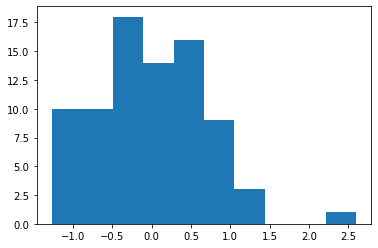

In [20]:
plt.hist(avg_time_per_cell.flatten() - 4.52)

In [10]:
np.array(np.round(time_spent_per_cell.sum(axis=0) / time_spent_per_cell.notna().sum(axis=0), 2)).mean()

4.5209876543209875

In [14]:
np.round(avg_time_per_cell - np.array(np.round(time_spent_per_cell.sum(axis=0) / time_spent_per_cell.notna().sum(axis=0), 2)).mean(), 2).flatten()

array([-1.09, -0.35,  0.37, -0.77, -0.07, -0.59, -1.06, -0.91, -0.55,
       -0.17,  0.69,  0.2 , -0.9 , -0.96, -0.7 , -0.94,  0.57, -0.23,
       -1.02,  0.15, -0.13,  0.27, -0.31, -0.33,  0.42,  0.08,  0.46,
        0.52, -0.49, -0.49,  0.87,  0.58, -1.27, -0.47, -0.56,  2.6 ,
       -0.47,  0.85,  0.38,  0.41,  1.1 ,  0.86, -1.12, -0.2 ,  0.08,
        1.09,  1.  , -0.08,  0.64,  0.15,  0.77, -0.71,  0.17, -0.4 ,
       -0.66, -0.93,  0.41,  0.32,  0.31, -0.62, -0.35, -0.21,  1.41,
        0.38,  0.14,  0.35,  0.81,  0.59, -0.73, -0.4 , -0.34, -0.64,
       -0.17,  0.24, -0.04,  0.75,  0.26,  0.99,  0.65, -0.29, -0.09])